#### JPMorgan Trading Strategy
###### This strategy is based on the following article: https://www.bloomberg.com/news/articles/2022-02-08/jpmorgan-strategists-see-sure-fire-sign-it-s-time-to-buy-stocks
###### The strategy buys the ^GSPC (S&P500) when the Cboe Volatility Index (VIX) rises by more than 50% of its 1-month moving average.

In [30]:
import yfinance as yf
import numpy as np

import pandas as pd
from pandas.tseries.offsets import DateOffset

#### Get Date
###### Put ^VIX data into a dataframe

In [31]:
vix_df = yf.download('^VIX', end='2022-02-08')

[*********************100%***********************]  1 of 1 completed


#### Prepare Data
###### Add moving average

In [32]:
vix_df['MA'] = vix_df.Close.rolling('30D').mean()

###### Only show the rows where the condition is met and there's month inbetween signals

In [33]:
vix_df_filt = vix_df[vix_df.Close > 1.5 * vix_df.MA]

series = pd.Series(vix_df_filt.index).diff() / np.timedelta64(1, 'D') >= 30
series[0] = True

In [34]:
signals = vix_df_filt[series.values]
signals.shape

(21, 7)

### S&P500 Data
###### Backtest buying the S&P500 whenever we get a buy signal

In [35]:
sp_df = yf.download('^GSPC', start='1990-01-01', end='2022-02-08')

[*********************100%***********************]  1 of 1 completed


In [36]:
returns = []

for i in range(len(signals)):
    sub_df = sp_df[(sp_df.index >= signals.index[i]) & 
                (sp_df.index <= signals.index[i] + DateOffset(months=6))]
    returns.append((sub_df.Close.pct_change() + 1).prod())

In [37]:
pd.Series(returns) - 1

0     0.070687
1     0.035701
2     0.230247
3     0.122635
4     0.048426
5    -0.327113
6     0.086602
7     0.120685
8     0.116117
9     0.062629
10   -0.026947
11    0.111112
12    0.074374
13    0.072259
14    0.036806
15    0.252754
16    0.172230
17    0.063669
18    0.173482
19   -0.024104
20    0.029249
dtype: float64

### Plot results

<AxesSubplot:>

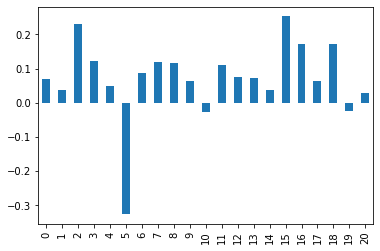

In [38]:
(pd.Series(returns) - 1).plot(kind='bar')